# 4. Kernel SVM

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassificationReport

plt.style.use("default")

In [2]:
%store -r X_train
%store -r X_test
%store -r y_train
%store -r y_test
%store -r label_encoder
%store -r classes

Let's start by doing a grid search

In [3]:
rbf_svm = Pipeline([
    ("rbf_svm",SVC())
])
grid_rbf = {
    "rbf_svm__C":np.logspace(-4,4,num=9),
    "rbf_svm__gamma":np.logspace(-4,4,num=9)
}

In [4]:
gs_rbf_svm = GridSearchCV(rbf_svm,grid_rbf,cv=5,return_train_score=True)
gs_rbf_svm.fit(X_train,y_train);

In [5]:
cv_results = pd.DataFrame(gs_rbf_svm.cv_results_)[["mean_test_score","param_rbf_svm__C","param_rbf_svm__gamma"]]
cv_results.sort_values(by="mean_test_score",ascending=False).head(3)

,mean_test_score,param_rbf_svm__C,param_rbf_svm__gamma
47,0.718667,10,0.01
74,0.705333,10000,0.01
56,0.705333,100,0.01


 Let's now plot a decision matrix and the classification report :

/Users/jasonola/opt/anaconda3/envs/exts-ml/lib/python3.6/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


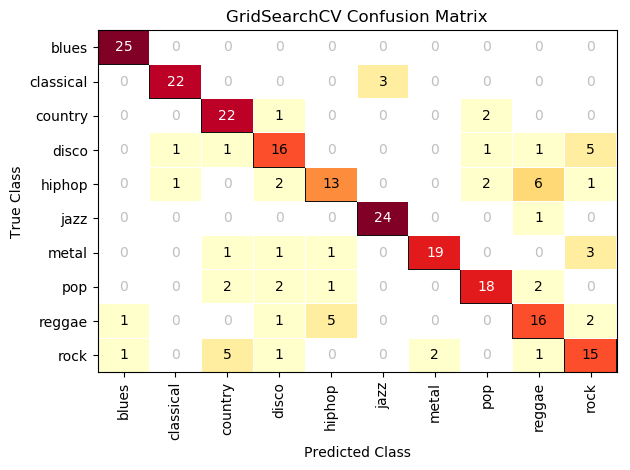

In [7]:
cm_svm= ConfusionMatrix(gs_rbf_svm,classes=classes,label_encoder=label_encoder)
cm_svm.fit(X_train,y_train)
cm_svm.score(X_test,y_test)
cm_svm.show();

/Users/jasonola/opt/anaconda3/envs/exts-ml/lib/python3.6/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


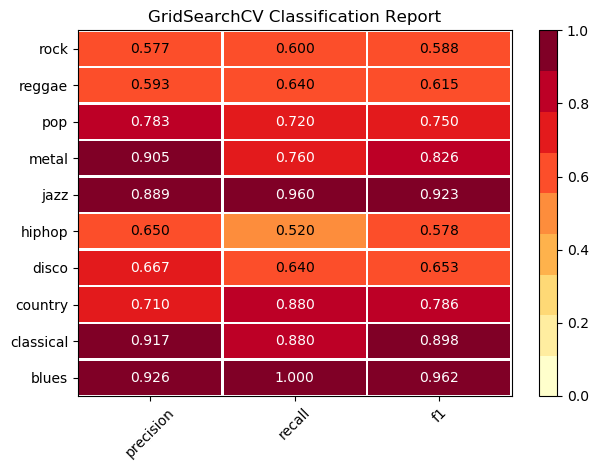

In [8]:
report = ClassificationReport(gs_rbf_svm,encoder=label_encoder)
report.fit(X_train,y_train)
report.score(X_test,y_test)
report.show();

We see this time that it's hip hop that struggles to be classified, rock is still not very good. Blues on the other hand is this time very well classified same goes with jazz. It's funny they are both well classified as they are genres often mixed up by people.